In [56]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

import sys
sys.path.append("../../")
import os.path
from src.compress_sensing_library import *
from src.utility_library import *

# Package for importing image representation
from PIL import Image, ImageOps

import pandas as pd
import seaborn as sns
import time

In [57]:
img = 'tree_part1.jpg'
img_nm = 'tree_part1'

num_cell_list = [50, 100, 200, 300, 500]
save = False


V1_data = '../../result/dct/{img}/V1/param_Mon_Apr_24_13_00_36_2023.csv'.format(img = img_nm)
pixel_data = '../../result/dct/{img}/pixel/param_Mon_Apr_24_12_27_11_2023.csv'.format(img = img_nm)
gaussian_data = '../../result/dct/{img}/gaussian/param_Mon_Apr_24_12_26_31_2023.csv'.format(img = img_nm)
# V1_data = 'param_Mon_Apr_24_13_00_36_2023.csv'
# pixel_data = 'param_Mon_Apr_24_12_27_11_2023.csv'
# gaussian_data = 'param_Mon_Apr_24_12_26_31_2023.csv'


In [58]:
process_result_data(img, 'dct', pixel_data, gaussian_data, V1_data)

FileNotFoundError: [Errno 2] No such file or directory: '/home/bans/Documents/research/result/dct/tree_part1/V1/../../result/dct/tree_part1/V1/param_Mon_Apr_24_13_00_36_2023.csv'

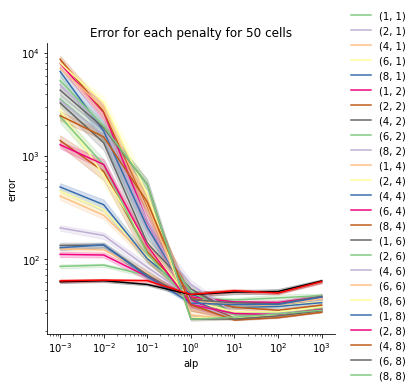

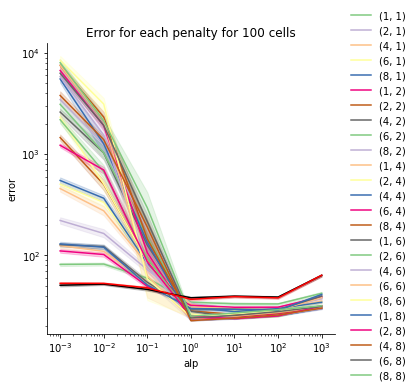

KeyboardInterrupt: 

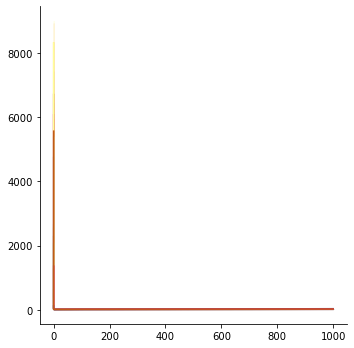

In [59]:
for num_cell in num_cell_list:
    # Work on previously saved data
    V1_param_df = remove_unnamed_data(pd.read_csv(V1_data))
    pixel_param_df = remove_unnamed_data(pd.read_csv(pixel_data))
    gaussian_param_df = remove_unnamed_data(pd.read_csv(gaussian_data))


    # bring only specific number of cell data
    V1_param_df = V1_param_df[V1_param_df['num_cell'] == num_cell]
    pixel_param_df = pixel_param_df[pixel_param_df['num_cell'] == num_cell]
    gaussian_param_df = gaussian_param_df[gaussian_param_df['num_cell'] == num_cell]
#     save_path = os.path.join('./result/{img}/V1/'.format(img = working_img.split('.')[0]))
    
#     fig = sns.relplot(data = V1_param_df, x = 'alp', y = 'error', kind='line', palette='Accent', 
#                       hue = V1_param_df[['sparse_freq', 'cell_sz']].apply(tuple, axis = 1))
#     fig.set(yscale='log')
#     fig.set(xscale='log')
#     fig.set(title='error for each frequency for {cell} number of cell'.format(cell = num_cell))
#     if (save):
#         fig.savefig(os.path.join(save_path, "alpha_error_per_hyperparam_{cell}_num_cell_".
#                                  format(cell = num_cell) + "_".
#                                  join(str.split(time.ctime().replace(":", "_"))) + ".png"), dpi = 200)
#     plt.show()


#     save_path = os.path.join('./result/{img}/'.format(img = working_img.split('.')[0]))
    fig = sns.relplot(data = V1_param_df, x = 'alp', y = 'error', kind='line', palette='Accent', 
                      hue = V1_param_df[['sparse_freq', 'cell_size']].apply(tuple, axis = 1), legend = True)

    fig.set(title='Error for each penalty for {cell} cells'.format(cell = num_cell))
    fig.map(sns.lineplot, x = 'alp', y = 'error', data = pixel_param_df, 
            label= 'pixel_error', color = 'black', 
            legend = False)#.add_legend(title='Pixel & Gaussian', loc = 'right')
    fig.map(sns.lineplot, x = 'alp', y = 'error', data = gaussian_param_df, 
            label= 'gaussian_error', color = 'red', 
            legend = False)
    fig.set(yscale='log')
    fig.set(xscale='log')
#     plt.legend(title = 'V1')
    # plt.legend(title = 'pixel', label = ['classic'])

    if (save):
        fig.savefig(os.path.join(save_path, "Error_for_each_penalty_{cell}_num_cell_".
                                 format(cell = num_cell) + "_".
                                 join(str.split(time.ctime().replace(":", "_"))) + ".png"), dpi = 200)
    plt.show()


#     save_path = os.path.join('./result/{img}/pixel/'.format(img = working_img.split('.')[0]))

#     pixel_fig = sns.relplot(data = pixel_param_df, x = 'alpha', y = 'error', kind= 'line')
#     pixel_fig.set(yscale='log')
#     pixel_fig.set(xscale='log')
#     plt.title('pixel: Error for each penalty {cell} cells'.format(cell = num_cell))

#     if (save):
#         pixel_fig.savefig(os.path.join(save_path, "Error_for_each_penalty_" + "_".join(
#             str.split(time.ctime().replace(":", "_"))) + ".png"), dpi = 200)
#     plt.show()

In [ ]:
num_cell = 50
pixel_param_df = remove_unnamed_data(pd.read_csv(pixel_data))

In [ ]:

pixel_param_df = pixel_param_df[pixel_param_df['num_cell'] == num_cell]
pixel_param_df

In [70]:
V1_param_df

,rep,alp,num_cell,cell_size,sparse_freq,error
50,0,0.001,200,1,1,97.110495
51,0,0.001,200,1,2,267.545128
52,0,0.001,200,1,4,401.441712
53,0,0.001,200,1,6,561.642904
54,0,0.001,200,1,8,645.069475
...,...,...,...,...,...,...
17445,19,1000.000,200,8,1,42.750334
17446,19,1000.000,200,8,2,31.478733
17447,19,1000.000,200,8,4,29.740761
17448,19,1000.000,200,8,6,31.179269


In [71]:
def alpha_error(img, pixel_data, gaussian_data, V1_data):
    if None in [pixel_data, gaussian_data, V1_data]:
        print("Currently all file required")
        sys.exit(0)
    
    # Preprocess data not to have 
    pixel_df = remove_unnamed_data(pd.read_csv(pixel_data))
    gaussian_df = remove_unnamed_data(pd.read_csv(gaussian_data))
    V1_df = remove_unnamed_data(pd.read_csv(V1_data))
    
    alp = pixel_df["alp"].unique()
    num_cell = pixel_df["num_cell"].unique()
    cell_size = None
    sparse_freq = None
    
    lv = None
    
    method = "dct"
    observation = "V1"
    
    
    if (method.lower() == "dct") :
        if (observation.upper() == 'V1') : 
            cell_size = V1_df["cell_size"].unique()
            sparse_freq = V1_df["sparse_freq"].unique()
    elif (method.lower() == "dwt") :mean
        lv = pixel_df['lv'].unique()
        if (observation.upper() == 'V1') :
            cell_size = V1_df["cell_sz"].unique()
            sparse_freq = V1_df["sparse_freq"].unique()
    
    print(alp, num_cell, cell_size, sparse_freq)
    
    itertools.product()
    

In [72]:
alpha_error('tree_part1.jpg', pixel_data, gaussian_data, V1_data)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03] [ 50 100 200 300 500] [1 2 4 6 8] [1 2 4 6 8]


In [ ]:
def alpha_error(img, pixel_data, gaussian_data, V1_data):
    if None in [pixel_data, gaussian_data, V1_data]:
        print("Currently all file required")
        sys.exit(0)
    
    # Preprocess data not to have 
    pixel_df = remove_unnamed_data(pd.read_csv(pixel_data))
    gaussian_df = remove_unnamed_data(pd.read_csv(gaussian_data))
    V1_df = remove_unnamed_data(pd.read_csv(V1_data))
    
#     for data in [pixel_df, gaussian_df, V1_df] :
    for col in pixel_df.columns:
        
    
    

In [82]:
pixel_param_df.columns[1:-1]

Index(['alp', 'num_cell'], dtype='object')

In [185]:
V1_param_df_mean['error'].mean()

565.8289680293315

In [242]:
V1_param_df_mean = V1_param_df.groupby('alp	num_cell	cell_size	sparse_freq'.split('\t'), as_index = False).mean().drop('rep', axis=1)
V1_param_df_mean

,alp,num_cell,cell_size,sparse_freq,error
0,0.001,200,1,1,83.255814
1,0.001,200,1,2,268.247096
2,0.001,200,1,4,509.891351
3,0.001,200,1,6,595.556115
4,0.001,200,1,8,621.617116
...,...,...,...,...,...
170,1000.000,200,8,1,40.415118
171,1000.000,200,8,2,30.772934
172,1000.000,200,8,4,29.559472
173,1000.000,200,8,6,31.227252


In [182]:
V1_param_df.iloc[(V1_param_df['error'] - V1_param_df['error'].median()).abs().argsort()][:1]

,rep,alp,num_cell,cell_size,sparse_freq,error
5182,5,1000.0,200,2,4,28.620810
16060,18,0.1,200,4,1,28.632905
12925,14,100.0,200,1,1,28.634627
6937,7,1000.0,200,4,4,28.646472
699,0,100.0,200,8,8,28.599801
7807,8,1000.0,200,2,4,28.681774
9449,10,100.0,200,8,8,28.565658
13824,15,100.0,200,8,8,28.700156
12074,13,100.0,200,8,8,28.707610
1683,1,1000.0,200,2,6,28.709155


In [181]:
img_arr = process_image('tree_part1.jpg', 'black')
reconst = filter_reconstruct(img_arr, alpha = 1000, num_cell = 200, cell_size = 2, 
                   sparse_freq = 4, observation = "V1")
error_calculation(img_arr, reconst)

28.513583507592386

In [243]:
V1_param_df_mean.iloc[(V1_param_df_mean['error'] - V1_param_df_mean['error'])]

,alp,num_cell,cell_size,sparse_freq,error
0,0.001,200,1,1,83.255814
0,0.001,200,1,1,83.255814
0,0.001,200,1,1,83.255814
0,0.001,200,1,1,83.255814
0,0.001,200,1,1,83.255814
...,...,...,...,...,...
0,0.001,200,1,1,83.255814
0,0.001,200,1,1,83.255814
0,0.001,200,1,1,83.255814
0,0.001,200,1,1,83.255814


In [245]:
V1_param_df_mean.loc[V1_param_df_mean['error'] == V1_param_df_mean['error'].median()]

,alp,num_cell,cell_size,sparse_freq,error
159,1000.0,200,2,8,29.17358


In [246]:
V1_param_df_mean.sort_values('error').median()

alp              1.00000
num_cell       200.00000
cell_size        4.00000
sparse_freq      4.00000
error           29.17358
dtype: float64

In [247]:
V1_param_df_mean.loc[V1_param_df_mean['num_cell'] == 200 & 
                     V1_param_df_mean["cell_size"] == 2 & 
                     V1_param_df_mean["sparse_freq"]== 8]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [230]:
V1_param_df_mean.columns

Index(['error'], dtype='object')

/home/bans/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/home/bans/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/home/bans/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(


56.790247597824596

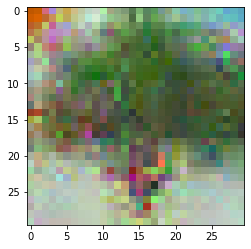

In [87]:
img_arr = process_image('tree_part1.jpg', '-c')

reconst = filter_reconstruct(img_arr,
    300,
    cell_size=None,
    sparse_freq=None,
    filter_dim=(30, 30),
    alpha=None,
    method='dwt',
    observation='pixel',
    lv=4,
    dwt_type='db2',
    rand_weight=False,
    mode='color',
)
plt.imshow(reconst)
error_calculation(img_arr, reconst)

In [88]:
from pywt import dwtn_max_level

/home/bans/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/home/bans/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/home/bans/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(


51.23492732285055


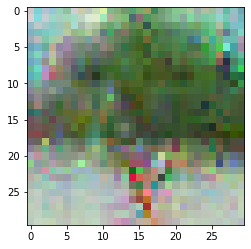

91.16113938150035


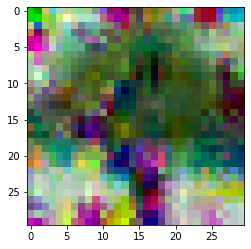

In [140]:
img_arr = process_image('tree_part1.jpg', '-c')
lv = dwtn_max_level(img_arr.shape, 'db2', [0, 1]) -1 
reconst = filter_reconstruct(img_arr,
    300,
    cell_size=None,
    sparse_freq=None,
    filter_dim=(30, 30),
    alpha=None,
    method='dwt',
    observation='pixel',
    lv=4,
    dwt_type='db2',
    rand_weight=False,
    mode='color',
)
plt.imshow(reconst)
print(error_calculation(img_arr, reconst))
plt.show()

optLV_reconst = filter_reconstruct(img_arr,
    300,
    cell_size=None,
    sparse_freq=None,
    filter_dim=(30, 30),
    alpha=None,
    method='dwt',
    observation='pixel',
    lv=lv,
    dwt_type='db2',
    rand_weight=False,
    mode='color',
)
plt.imshow(optLV_reconst)
print(error_calculation(img_arr, optLV_reconst))
plt.show()

In [101]:
dwtn_max_level(img_arr.shape, 'db2')

3